# Tutorial for differential equations
## Basic Symbolic Techniques

Solving differential equations is a combination of exact and numerical methods, and hence a great place to explore with the computer. We have already seen one example of this in the calculus tutorial, which is worth reviewing.

In [1]:
y = function('y')(x)
de = diff(y,x) + y -2
h = desolve(de, y)

Forgetting about plotting for the moment, notice that there are three things one needs to solve a differential equation symbolically:

- an abstract function `y`;
- a differential equation, which here we put in a separate line;
- the actual **d**ifferential **e**quation **solve** command (bold for the acronym `desolve`).

In [2]:
expand(h)

_C*e^(-x) + 2

Since we did not specify any initial conditions, Sage (from Maxima) puts in a parameter. If we want to put in an initial condition, we use `ics` (for **i**nitial **c**ondition**s**). For example, we set `ics=[0,3]` to specify that when $x=0$, $y=3$.

In [3]:
h = desolve(de, y, ics=[0,3]); h
expand(h)

e^(-x) + 2

And of course we have already noted that we can plot all this with a slope field.

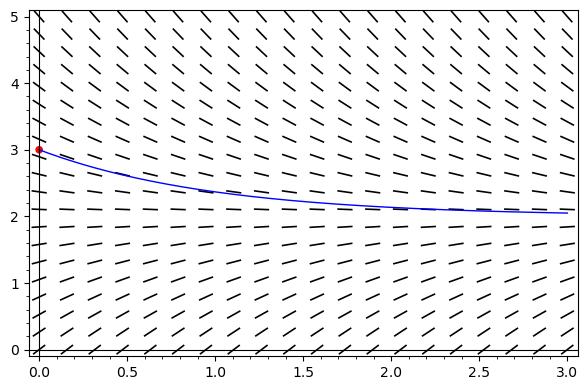

In [4]:
y = var('y') 
Plot1=plot_slope_field(2-y,(x,0,3),(y,0,5))
Plot2=plot(h,x,0,3)
Point=point((0,3),pointsize=30,rgbcolor=(1,0,0))
Plot1+Plot2+Point 

Regarding symbolic functions versus symbolic variables:

- If you wanted to make `y` an abstract function again instead of a variable, you’d have to do that separately. A differential equation requires a function but plotting requires a `var`.
- Another option is to let `z` be the name of the vertical axis variable.
- Either way something will have to give, since in common speaking about these things we treat `y` as both a variable and a function, which is much trickier to accomplish with a computer.

There are many other differential equation facilities in Sage. We can’t cover all the variants of this in a quickstart, but the documentation is good for symbolic solvers.

In [5]:
desolvers?

Type:            module
String form:     <module 'sage.calculus.desolvers' from '/usr/lib/python3/dist-packages/sage/calculus/desolvers.py'>
File:            /usr/lib/python3/dist-packages/sage/calculus/desolvers.py
Docstring:      
Solving ordinary differential equations

This file contains functions useful for solving differential equations
which occur commonly in a 1st semester differential equations course.
For another numerical solver see the "ode_solver()" function and the
optional package Octave.

Solutions from the Maxima package can contain the three constants
"_C", "_K1", and "_K2" where the underscore is used to distinguish
them from symbolic variables that the user might have used. You can
substitute values for them, and make them into accessible usable
symbolic variables, for example with "var("_C")".

Commands:

* "desolve()" - Compute the "general solution" to a 1st or 2nd order
  ODE via Maxima.

* "desolve_laplace()" - Solve an ODE using Laplace transforms via
  Maxima

For instance, Maxima can do systems, as well as use Laplace transforms, and we include versions of these wrapped for ease of use.

In all differential equation solving routines, it is important to pay attention to the syntax! In the following example, we have placed the differential equation in the body of the command, and had to specify that `f` was the **d**ependent **var**iable (`dvar`), as well as give initial conditions $f(0)=1$  and $f'(0)=2$, which gives the last list in the example.

In [6]:
f=function('f')(x)
desolve_laplace(diff(f,x,2) == 2*diff(f,x)-f, dvar = f, ics = [0,1,2])

x*e^x + e^x

In [7]:
g(x)=x*e^x+e^x
derivative(g,x,2)-2*derivative(g,x)+g

x |--> 0

## Numerical and Power Series Methods

There are also numerical methods.

For instance, one of the options above was desolve_rk4. This is a fourth-order Runge-Kutta method, and returns appropriate (numerical) output. Here, we must give the dependent variable and initial conditions.

In [10]:
y = function('y')(x)
de = diff(y,x) + y -2
h = desolve_rk4(de, y, step=.05, ics=[0,3])

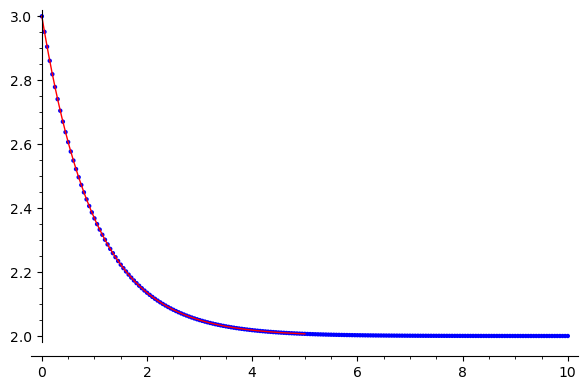

In [9]:
h1 = desolve(de, y, ics=[0,3])
plot(h1,(x,0,5),color='red')+points(h)

The primary use of numerical routines from here is pedagogical in nature.

[For more advanced numerical routines, we primarily use the GNU scientific library. Using this is a little more sophisticated, but gives a wealth of options.](https://doc.sagemath.org/html/en/reference/calculus/sage/calculus/ode.html)

We can even do power series solutions. In order to do this, we must first define a special power series ring , including the precision.

In [19]:
R.<t> = PowerSeriesRing(QQ, default_prec=10)
a = -1 + 0*t
b = 2 + 0*t
h=a.solve_linear_de(b=b,f0=3,prec=10)
h

3 - t + 1/2*t^2 - 1/6*t^3 + 1/24*t^4 - 1/120*t^5 + 1/720*t^6 - 1/5040*t^7 + 1/40320*t^8 - 1/362880*t^9 + O(t^10)

In [20]:
a.solve_linear_de??

Docstring:
   Obtain a power series solution to an inhomogeneous linear
   differential equation of the form:

      f'(t) = a(t) f(t) + b(t).

   INPUT:

   * "self" - the power series a(t)

   * "b" - the power series b(t) (default is zero)

   * "f0" - the constant term of f ("initial condition") (default is
     1)

   * "prec" - desired precision of result (this will be reduced if
     either a or b have less precision available)

   OUTPUT: the power series f, to indicated precision

   ALGORITHM: A divide-and-conquer strategy; see the source code.
   Running time is approximately M(n) \log n, where M(n) is the time
   required for a polynomial multiplication of length n over the
   coefficient ring. (If you're working over something like \QQ,
   running time analysis can be a little complicated because the
   coefficients tend to explode.)

   Note:

     * If the coefficient ring is a field of characteristic zero, then
       the solution will exist and is unique.

     * For o

In [21]:
h = h.polynomial()
h


-1/362880*t^9 + 1/40320*t^8 - 1/5040*t^7 + 1/720*t^6 - 1/120*t^5 + 1/24*t^4 - 1/6*t^3 + 1/2*t^2 - t + 3

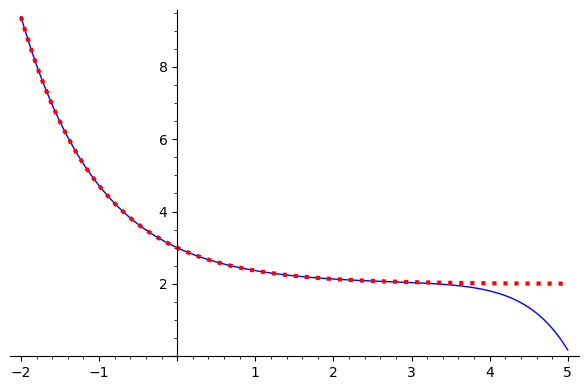

In [22]:
plot(h,-2,5)+plot(2+e^-x,(x,-2,5),color='red',linestyle=':',thickness=3)

This was just an introduction; there are a lot of resources for differential equations using Sage elsewhere, [including a book by David Joyner, who wrote much of the original code wrapping Maxima for Sage to do just this](https://www.google.com.mx/books/edition/Introduction_to_Differential_Equations_U/HOoR8YKvL4AC?hl=en&gbpv=0).